<a href="https://colab.research.google.com/github/Datalincy/EDA/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade seaborn featuretools tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 911.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 44

In [ ]:
!pip install package_name == x.y.z


ERROR: Invalid requirement: 'package_name==x.y.z': Expected end or semicolon (after name and no valid version specifier)
    package_name==x.y.z
                ^


In [ ]:
!pip install --upgrade --force-reinstall package_name


  Preparing metadata (setup.py) ... done
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1229 sha256=cc99e6e10f29017e861de8d0f154427591b89b1cd3eaa71372640351d975beb9
  Stored in directory: /root/.cache/pip/wheels/b3/c1/6f/538e951eb00f535f43151173b4c55e463a35c17b9e90ab3b1a
Successfully built package_name


In [ ]:
import os
os._exit(00)


In [ ]:
!pip list | grep seaborn

seaborn                            0.13.2


In [ ]:
!pip install --upgrade seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tpot import TPOTRegressor
from sklearn.datasets import fetch_california_housing

In [ ]:
# Objective: Train a machine learning model on a housingdataset using ensemble learning techniques: Bagging, Boosting, and Stacking.
# Additionally,perform automated feature engineering and feature extraction from time series and geospatial data.

# Load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

In [ ]:
#Featuring Engineering with FeatureTools
es = ft.EntitySet(id="housing")
es.add_dataframe(dataframe_name="data", dataframe=df, index="index")
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="data", trans_primitives=["add_numeric", "multiply_numeric"])


/usr/local/lib/python3.11/dist-packages/featuretools/entityset/entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [ ]:
# Selecting numerical features and target
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']].dropna()
y = df['Target']

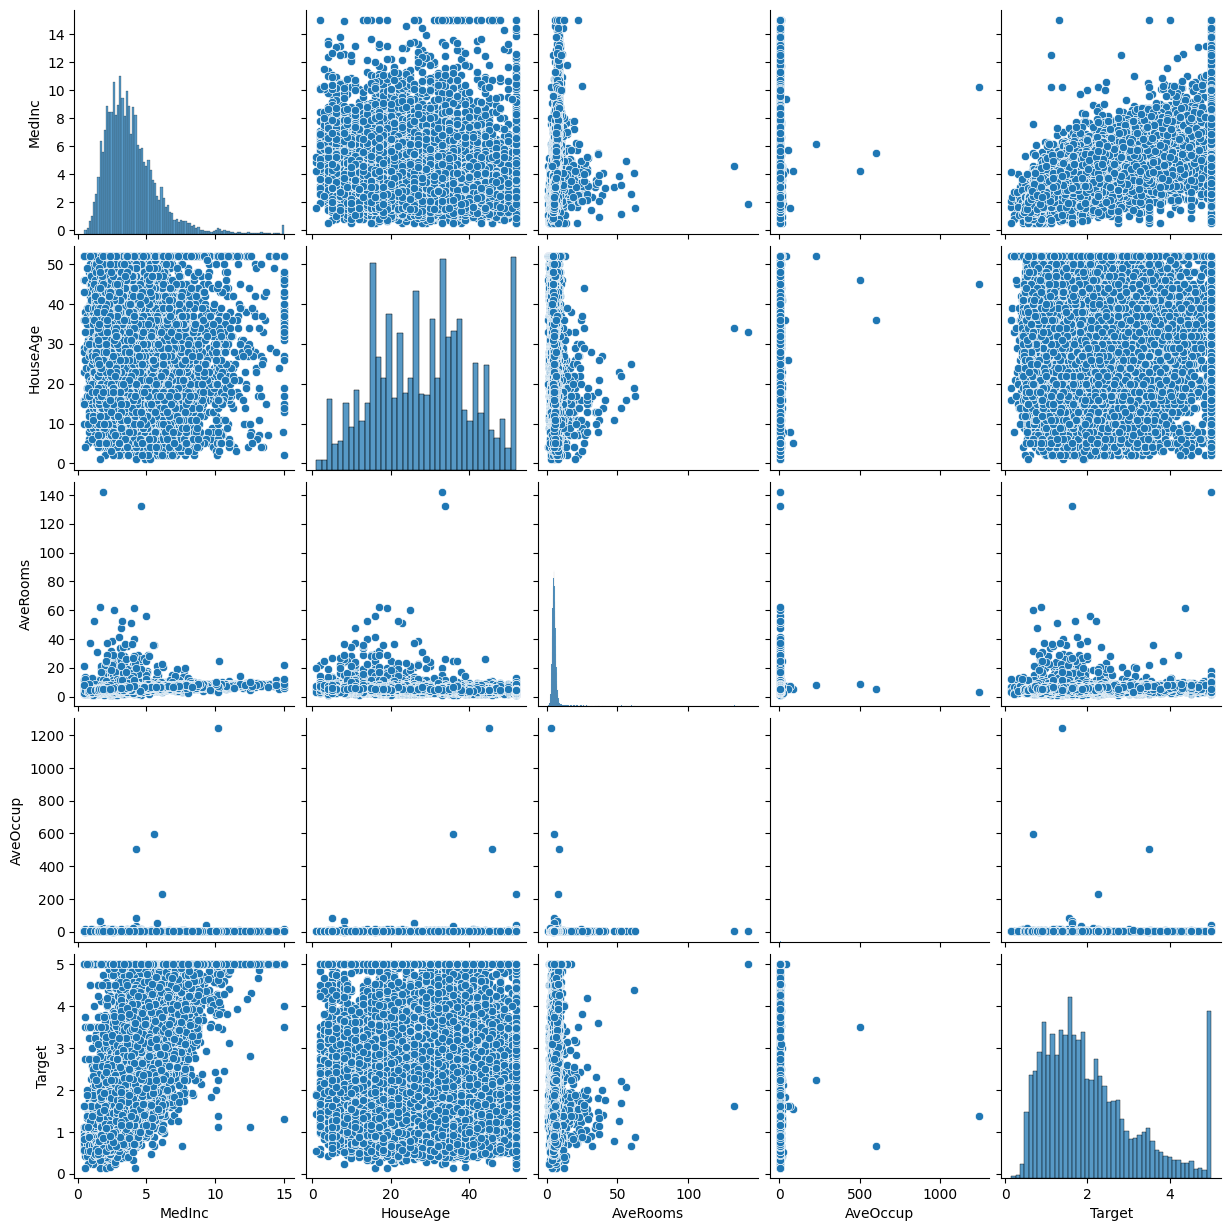

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Target']])
plt.show()

In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

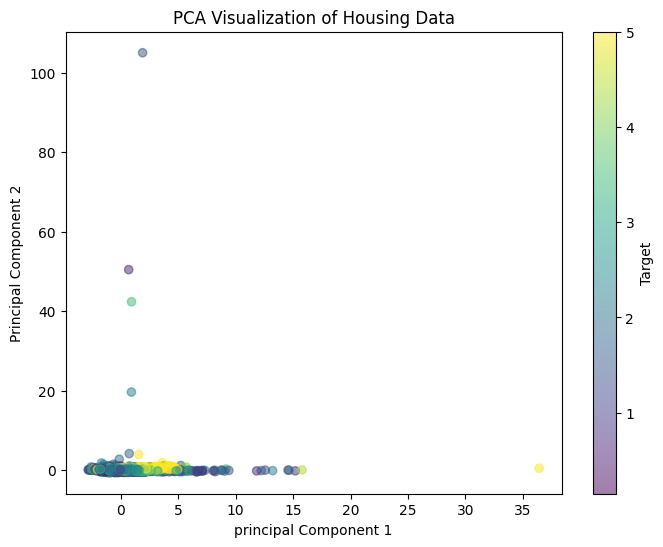

In [ ]:
# PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Target')
plt.xlabel('principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Housing Data')
plt.show()

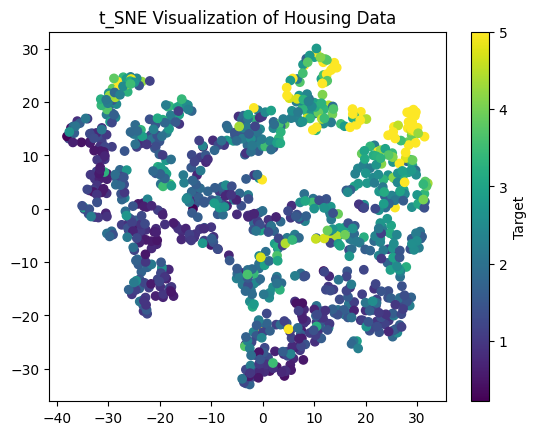

In [ ]:
# Apply t_SNE for Visualization
sample_size = 1000 # Reduce data for t_SNE to avoid computation overload
X_sample, y_sample = X_train[:sample_size], y_train[:sample_size]
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_sample)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_sample, cmap='viridis')
plt.colorbar(label='Target')
plt.title("t_SNE Visualization of Housing Data")
plt.show()

In [ ]:
# Train Ensamble Models
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(X_train_pca, y_train)

boosting_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
boosting_model.fit(X_train_pca, y_train)

stacking_model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train_pca, y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
# Automated Model Selection with TPOT
tpot = TPOTRegressor(generations=5, population_size=50, random_state=42)
tpot.fit(X_train_pca, y_train)

try:
    tpot = TPOTRegressor(generations=5, population_size=50, random_state=42)
    tpot.fit(X_train_pca, y_train)
except Exception as e:
    print(f"An error occurred: {e}")

/usr/local/lib/python3.11/dist-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.11/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46747 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41301
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:46747/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40235'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:37351 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37351
INFO:dis

Exception: ModuleNotFoundError("No module named 'numpy._core.numeric'")